In [3]:
! pip install InstructorEmbedding

In [6]:
! pip install sentence-transformers==2.2.2

     ---------------------------------------- 0.0/86.0 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/86.0 kB ? eta -:--:--
     --------- ---------------------------- 20.5/86.0 kB 217.9 kB/s eta 0:00:01
     ------------- ------------------------ 30.7/86.0 kB 217.9 kB/s eta 0:00:01
     --------------------------- ---------- 61.4/86.0 kB 326.1 kB/s eta 0:00:01
     -------------------------------------- 86.0/86.0 kB 402.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for sentencepiece from https://files.pythonhosted.org/packages/a2/f6/587c62fd21fc988555b85351f50bbde43a51524caafd63bc69240ded14fd/sentencepiece-0.2.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/991.5 kB ? eta -:--:--
   -- ------------------------------------- 71.7/991.5 kB 3.8 MB/s eta 0:00:01
   --------- ------------------------------ 225.3/991.5 kB 2.8 

In [1]:
# import os
from InstructorEmbedding import INSTRUCTOR
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

D:\Users\dell\anaconda3\Lib\site-packages\InstructorEmbedding\instructor.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange


In [2]:
openpack_sentences = {
    100: 'Picking',
    200: 'Relocate Item Label',
    300: 'Assemble Box',
    400: 'Insert Items',
    500: 'Close Box',
    600: 'Attach Box Label',
    700: 'Scan Label',
    800: 'Attach Shipping Label',
    900: 'Put on Back Table',
    1000: 'Fill out Order'
}

In [3]:
model = INSTRUCTOR('hkunlp/instructor-large')
embeddings = model.encode(list(openpack_sentences.values()))
print(embeddings.shape)

.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.41k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

load INSTRUCTOR_Transformer


D:\Users\dell\anaconda3\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


max_seq_length  512
(10, 768)


In [7]:
kmeans = KMeans(n_clusters=10)
# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=5, metric="cosine", init="random")  # Adjust perplexity here
embeddings_tsne = tsne.fit_transform(embeddings)
labels = kmeans.fit_predict(embeddings)

D:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
embeddings_tsne.shape

(10, 2)

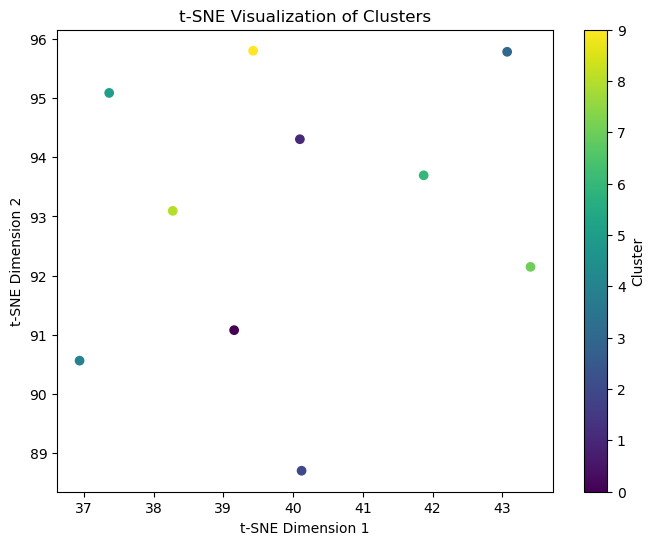

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1],c=labels, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
# plt.legend()
plt.colorbar(label='Cluster')
plt.show()

In [11]:
labels

array([2, 8, 6, 0, 7, 1, 5, 9, 4, 3])